## Import lib

In [97]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

## Get Data

In [2]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')
combine =[train,test]

## Analyze data

In [3]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

#### Which features are categorical?

Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

#### Which features are numerical?

Continous: Age, Fare. Discrete: SibSp, Parch.


In [5]:
#What are the data types for various features?

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [6]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# distribution of categorical features
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Exploratory Data Analysis

In [10]:
# Relation between Pclass and Survived 
train[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
# Relation between Survived and Sex
train[['Sex','Survived']].groupby('Sex').mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
# Relation between SibSp and Survived
train[['SibSp','Survived']].groupby('SibSp').mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Visuals

Text(0, 0.5, 'Number of Survivor')

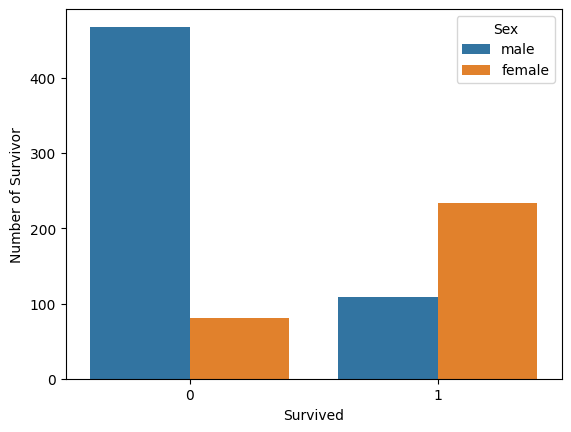

In [13]:
# Relation of Age and Survival
sns.countplot(x='Survived',hue='Sex',data=train)
plt.xlabel('Survived')
plt.ylabel('Number of Survivor')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

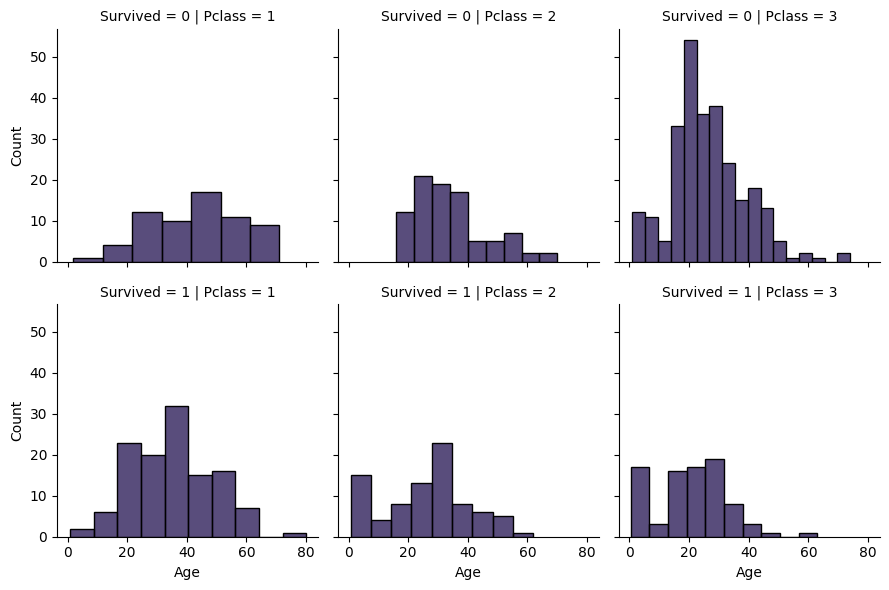

In [14]:
#Relation between age,Pclass and Survival.
sns.set_palette('magma')
g=sns.FacetGrid(data=train,col='Pclass',row='Survived')
g.map(sns.histplot,'Age')
plt.tight_layout

<Axes: xlabel='Age', ylabel='Count'>

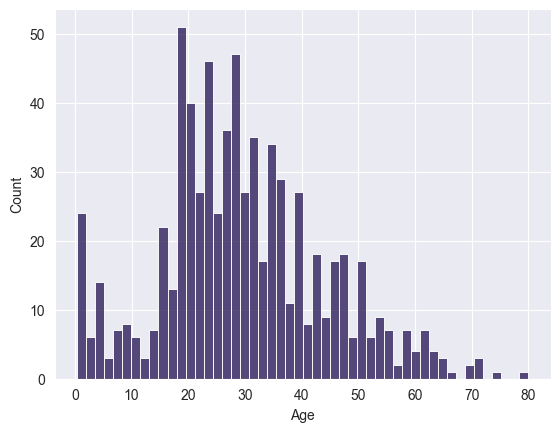

In [15]:
# Age distribuation  
sns.set_style('darkgrid')
sns.histplot(x='Age',data=train,bins=50)

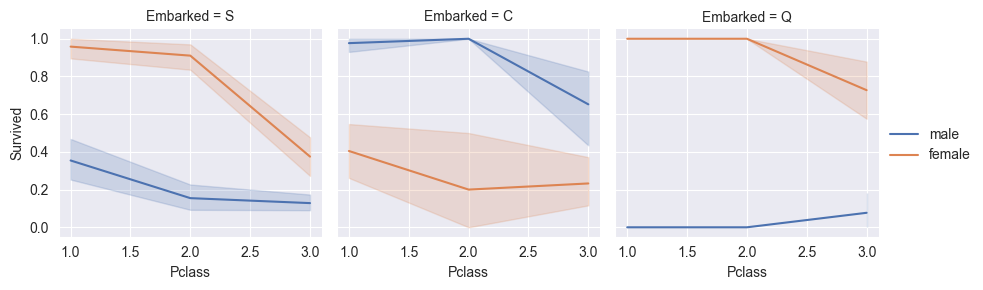

In [16]:
# Relation between Embarked,Sex,Pclass,Survival.
sns.set_palette('deep')
h=sns.FacetGrid(data=train,col='Embarked')
h.map(sns.lineplot,'Pclass','Survived','Sex')
h.add_legend()

Text(0, 0.5, 'Number of SibSp')

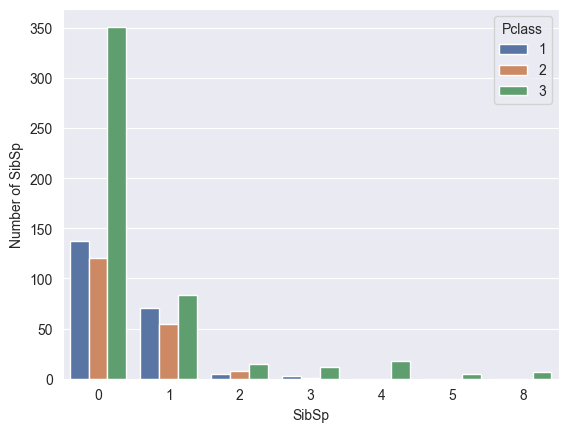

In [17]:
# Distribution of SipSp
sns.countplot(data=train,x='SibSp',hue='Pclass')
plt.ylabel("Number of SibSp")

Text(0, 0.5, 'Number of Parch')

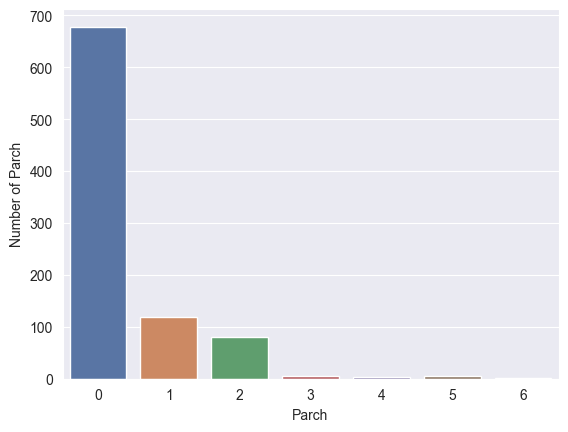

In [18]:
# Distrubution of Parch
sns.countplot(data=train,x='Parch')
plt.ylabel('Number of Parch')

<Axes: xlabel='Fare', ylabel='Count'>

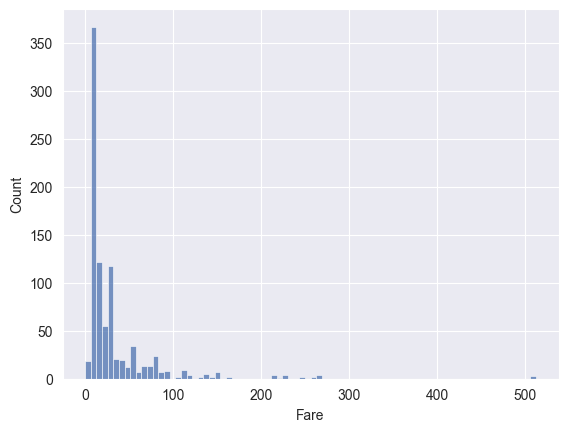

In [19]:
# distrubution of Fare with Pclass
sns.histplot(data=train,x='Fare',bins=80)

# Wrangle Data

<Axes: >

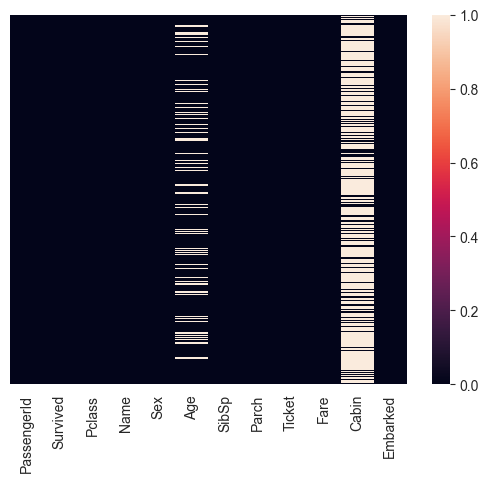

In [20]:
#visual for missing data
sns.heatmap(combine[0].isnull(),yticklabels=False)


<Axes: >

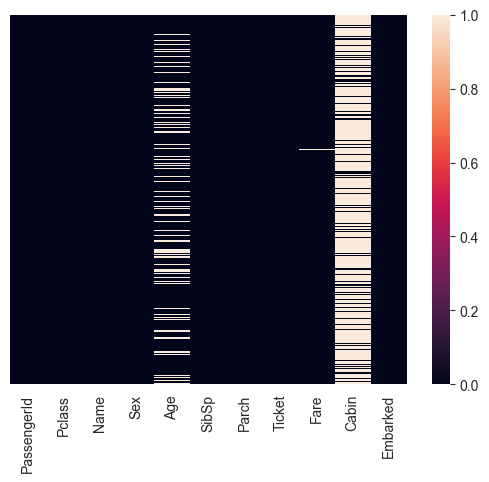

In [21]:
sns.heatmap(test.isnull(),yticklabels=False)

In [22]:
# droping some features 
train=train.drop(columns=['Ticket','Cabin'])
test=test.drop(columns=['Ticket','Cabin'])
combine=[train,test]

### Changes to Name column

In [23]:
# Creating Title colum to drop name
for data in combine:
    data['Title']=data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [24]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
# replace many titles with a more common name
for data in combine:
    data['Title']=data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    data['Title']=data['Title'].replace(['Mlle','Ms'],'Miss')
    data['Title']=data['Title'].replace('Mme','Mrs')

In [26]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [27]:
train[['Title','Survived']].groupby('Title').mean().sort_values(by='Survived',ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


In [28]:
# convert the categorical titles to ordinal
title_map={'Mrs':1,'Miss':3,'Master':4,'Mr':2,'Rare':5}
for data in combine:
    data['Title']=data['Title'].map(title_map)



In [29]:
# Droping PassengerId and Name From the data
train=train.drop(columns=['PassengerId','Name'])
test=test.drop(columns='Name')
combine=[train,test]

### Changes to sex column

In [30]:
train_sex={'female':0,'male':1}

for data in combine:
    data['Sex']=data['Sex'].map(train_sex)


### Changes to Embarked column

In [31]:
print(sum(train['Embarked'].isnull()))
print(sum(test['Embarked'].isnull()))

2
0


In [32]:
freq_port=train['Embarked'].mode()[0]

In [33]:
freq_port

'S'

In [34]:
# missing values filling
for data in combine:
    data['Embarked']=data['Embarked'].fillna(freq_port)

In [35]:
# changing to catgorical to numeric(Embarked to number)

for data in combine:
    data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2})

### Changes to Age column

In [36]:
# Guess Age or Adding missing age
guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [37]:
train['Age_band']=pd.cut(train['Age'],5)
train[['Age_band','Survived']].groupby('Age_band').mean()

,Survived
Age_band,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [38]:
# Creating the new values for the each age group
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [39]:
# drop the Age_band Column
train.drop(columns='Age_band',inplace=True)
combine=[train,test]

### Changes to SibSp,Parch column

In [40]:
# Creating Family_size feature
for data in combine:
    data['Family_size']=data['SibSp']+data['Parch']+1

In [41]:
# Creating IsAlone Feature 
for data in combine:
    data['IsAlone']=0
    data.loc[data['Family_size']==1,'IsAlone']=1

In [42]:
# droping Family_size, SibSP,Parch
train = train.drop(['Parch', 'SibSp', 'Family_size'], axis=1)
test = test.drop(['Parch', 'SibSp', 'Family_size'], axis=1)
combine = [train, test]

In [43]:
# Creating Age_class feature
for data in combine:
    data['Age*Class'] = data.Age * data.Pclass

### Changes to Fare column

In [44]:
# Entering the missing Fare Value
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

In [45]:
# Create the bands to ordinal feature
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

### The Final Dataset

In [46]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1,0,0,2,0,3
1,1,1,0,2,3,1,1,0,2
2,1,3,0,1,1,0,3,1,3
3,1,1,0,2,3,0,1,0,2
4,0,3,1,2,1,0,2,1,6


In [47]:
train.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
Survived,1.000000,-0.338481,-0.543351,-0.065095,0.295875,0.106811,0.055359,-0.203367,-0.095602
Pclass,-0.338481,1.000000,0.131900,-0.119955,-0.628459,0.045702,-0.006708,0.135207,0.017603
Sex,-0.543351,0.131900,1.000000,0.086719,-0.248940,-0.116569,0.014820,0.303646,0.089866
Age,-0.065095,-0.119955,0.086719,1.000000,0.026774,0.038064,-0.020313,0.063066,0.885165
Fare,0.295875,-0.628459,-0.248940,0.026774,1.000000,-0.091096,0.041761,-0.568942,-0.080463
Embarked,0.106811,0.045702,-0.116569,0.038064,-0.091096,1.000000,0.102632,0.017807,0.054868
Title,0.055359,-0.006708,0.014820,-0.020313,0.041761,0.102632,1.000000,0.012661,-0.042771
IsAlone,-0.203367,0.135207,0.303646,0.063066,-0.568942,0.017807,0.012661,1.000000,0.088593
Age*Class,-0.095602,0.017603,0.089866,0.885165,-0.080463,0.054868,-0.042771,0.088593,1.000000


<Axes: >

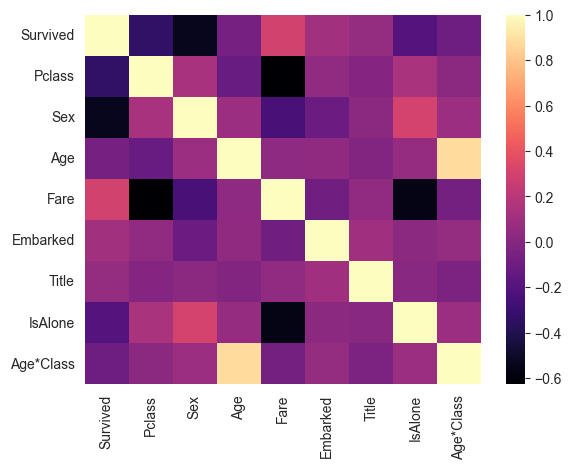

In [48]:
sns.heatmap(train.corr(),cmap='magma')

## Models

In [49]:
X_train=train.drop(columns='Survived')
y_train=train['Survived']
X_test  = test.drop("PassengerId", axis=1).copy()

In [50]:
X_train.shape,y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

## Logistic Regression

In [51]:
#Logistic Regression
log_Re= LogisticRegression()

In [52]:
# Fit model
log_Re.fit(X_train,y_train)

LogisticRegression()

In [53]:
# Prediction
pred = log_Re.predict(X_test)

In [54]:
# Accuracy
acc_log_Re = round((log_Re.score(X_train,y_train))*100,2)

In [55]:
acc_log_Re

79.24

In [59]:
log_Re.intercept_

array([2.97784582])

In [57]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(log_Re.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Age,0.277488
4,Embarked,0.249714
5,Title,0.088301
3,Fare,-0.053949
6,IsAlone,-0.088085
7,Age*Class,-0.299698
0,Pclass,-0.740140
1,Sex,-2.487810


## SVC

In [60]:
svc=SVC()

In [61]:
svc.fit(X_train,y_train)

SVC()

In [62]:
pred=svc.predict(X_test)

In [63]:
acc_svc = round((svc.score(X_train,y_train))*100,2)

In [64]:
acc_svc

76.77

## KNN

In [65]:
knn= KNeighborsClassifier()

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
pred=knn.predict(X_test)

In [68]:
acc_knn = round((knn.score(X_train,y_train))*100,2)

In [69]:
acc_knn

84.51

## Gaussian Naive Bayers

In [70]:
gausian=GaussianNB()

In [71]:
gausian.fit(X_train,y_train)

GaussianNB()

In [72]:
pred=gausian.predict(X_test)

In [73]:
acc_gau = round((gausian.score(X_train,y_train))*100,2)

In [74]:
acc_gau

70.82

## Linear_SVC

In [75]:
linear = LinearSVC()

In [76]:
linear.fit(X_train,y_train)

c:\users\sachin patil\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\users\sachin patil\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [77]:
pred=linear.predict(X_test)

In [78]:
acc_linear = round((linear.score(X_train,y_train))*100,2)

In [79]:
acc_linear

78.9

## Decision Tree

In [81]:
decision = DecisionTreeClassifier()

In [82]:
decision.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
pred = decision.predict(X_test)

In [84]:
acc_decision = round((decision.score(X_train,y_train))*100,2)

In [85]:
acc_decision

86.76

## Random Forest

In [86]:
random = RandomForestClassifier()

In [87]:
random.fit(X_train,y_train)

RandomForestClassifier()

In [126]:
pred = random.predict(X_test)

In [127]:
acc_random = round((random.score(X_train,y_train))*100,2)

In [128]:
acc_random

86.76

# Model Evaluvation

In [92]:
models =pd.DataFrame({
    'Models':['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest', 'Naive Bayes','Linear SVC', 'Decision Tree'],
    'Score':[acc_svc, acc_knn, acc_log_Re, acc_random, acc_gau, acc_linear, acc_decision]
})

In [95]:
models.sort_values(by='Score',ascending=False)

,Models,Score
3,Random Forest,86.76
6,Decision Tree,86.76
1,KNN,84.51
2,Logistic Regression,79.24
5,Linear SVC,78.90
0,Support Vector Machines,76.77
4,Naive Bayes,70.82


In [129]:
submision = pd.DataFrame({'PassengerId': test['PassengerId'],'Survived':pred})

In [130]:
submision['Survived'].value_counts()

Survived
0    258
1    160
Name: count, dtype: int64

In [131]:
submision.to_csv("my_submission.csv",index=False)